In [118]:
from __future__ import print_function, division

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Part 1

In [120]:
# TODO define gaussian function here
def gaussian(x, mean, var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))


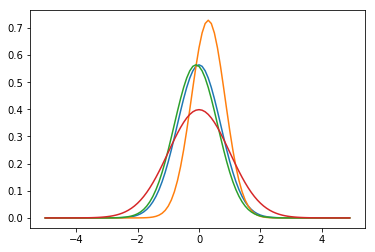

In [121]:
# TODO plot gaussians here
xarr = np.arange(-5, 5, 0.1)
yarr1 = gaussian(xarr, 0, 0.5)
yarr2 = gaussian(xarr, 0.3, 0.3)
yarr3 = gaussian(xarr, -0.1, 0.5)
yarr4 = gaussian(xarr, 0, 1)
plt.plot(xarr, yarr1)
plt.plot(xarr, yarr2)
plt.plot(xarr, yarr3)
plt.plot(xarr, yarr4)

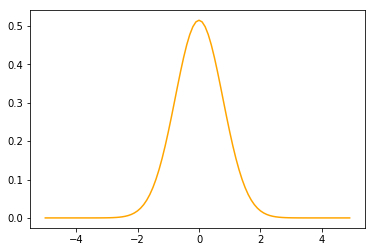

In [122]:
# Gaussian to analyze:
yarr = gaussian(xarr, 0, 0.6)
plt.plot(xarr, yarr, c="orange")

[4.24034563e-11 6.00000000e-01]


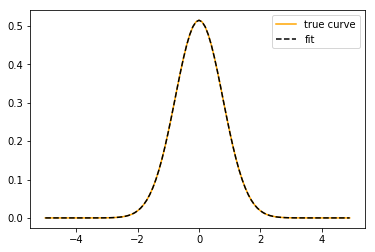

In [123]:
# TODO fit gaussians, with known parameters, here
params, cov = optimize.curve_fit(gaussian, xarr, yarr, p0 = [0,0.2])
print(params)
# TODO plot result
plt.plot(xarr,yarr, c="orange", label="true curve")
plt.plot(xarr, gaussian(xarr, *params), "k--", label="fit")
plt.legend()

In [124]:
# TODO: load data here
x, y = np.loadtxt("HDalpha_data", unpack=True)


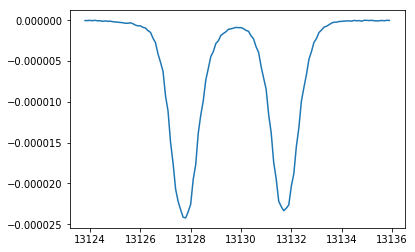

In [125]:
# TODO: plot it
plt.plot(x,y)

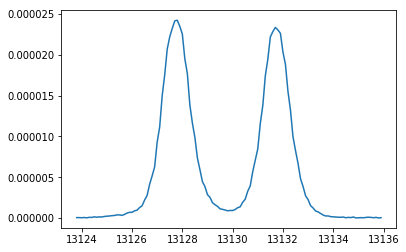

In [126]:
# TODO: plot data as emission signal
y = -y
plt.plot(x,y)

/Users/ChristianHaroldNunez/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,0,u'frequency (Hz)')

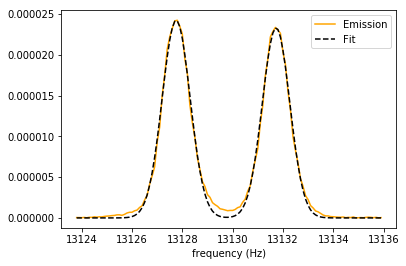

In [127]:
# TODO: fit a function to this data and plot it
def double_gaussian(x, mean1, var1, amp1, mean2, var2, amp2):
    return amp1*(1/np.sqrt(2*np.pi*var1))*np.exp(-(x-mean1)**2/(2*var1)) + amp2*(1/np.sqrt(2*np.pi*var2))*np.exp(-(x-mean2)**2/(2*var2))

params, cov = optimize.curve_fit(double_gaussian, x, y, p0 = [13128, 0.9, .000025, 13132, 0.9, 0.000024])
plt.plot(x, y, c="orange", label="Emission")
plt.plot(x, double_gaussian(x, *params), "k--", label="Fit")
plt.legend(loc="upper ight")
plt.xlabel("frequency (Hz)")

# Part 2

In [ ]:
# Generate data:
s = np.random.rand(100)
t = np.random.rand(100)

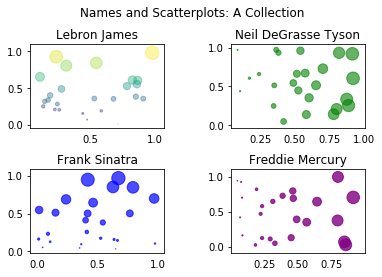

In [116]:
# TODO: part 2
f, parr = plt.subplots(2,2)
area_topleft = np.pi * t[0:25] * 60 * t[0:25]
area_botleft = np.pi * t[50:75] * 60 * t[50:75]
area_topright = np.pi * s[25:50] * 60 * s[25:50]
area_botright = np.pi * s[75:100] * 60 * s[75:100]

# Top left
parr[0,0].scatter(s[0:25], t[0:25], c=t[0:25], alpha=.4, s=area_topleft)
parr[0,0].set_title("Lebron James")
# Top right
parr[0,1].scatter(s[25:50], t[25:50], c="green", alpha=.6, s=area_topright)
parr[0,1].set_title("Neil DeGrasse Tyson")
# Bottom left
parr[1,0].scatter(s[50:75], t[50:75], c="blue", alpha=.7, s=area_botleft)
parr[1,0].set_title("Frank Sinatra")
# Bottom right
parr[1,1].scatter(s[75:100], t[75:100], c="purple", alpha=.8, s=area_botright)
parr[1,1].set_title("Freddie Mercury")

#Entire graph:
f.suptitle("Names and Scatterplots: A Collection")
f.subplots_adjust(top=0.85, hspace=0.5, wspace=0.5)
# Removing tickmarks
parr[0,0].tick_params(bottom="off", top="off")
parr[1,0].tick_params(bottom="off", top="off")
parr[0,1].tick_params(bottom="off", top="off")
parr[1,1].tick_params(bottom="off", top="off")

#Save figure:
plt.savefig("namesandscatterplots.pdf")


# Part 3

In [102]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

Text(0.5,1,u'Contour Diagram of Dipole')

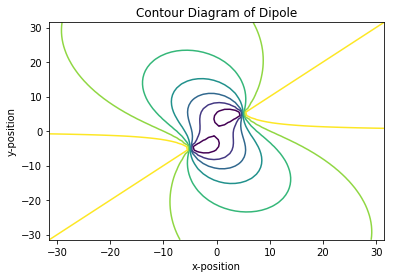

In [113]:
# TODO create arrays of information
X = np.linspace(start=-31.5, stop=31.5, num=64)
Y = np.linspace(start=-31.5, stop=31.5, num=64)
x = [-5, 5]
y = [-5, 5]
Q = [-1, 1]
z = flux_for_dipole(x, y, Q, X, Y)
plt.contour(X, Y, z, 10)
plt.xlabel("x-position")
plt.ylabel("y-position")
plt.title("Contour Diagram of Dipole")